# MSA 2023 Phase 2 - Part 1

In [36]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [37]:
# Load the CSV file into DataFrames and show the first ten instances

df_data_salaries = pd.read_csv('Resources/datasets/data_salaries.csv')

#print(df_data_salaries.head(10))
df_data_salaries.head(10)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [38]:
df_data_salaries.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [39]:
# I guess I would like to know more about data related professions earnings.
# Let's have a look, shall we?

df_data_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


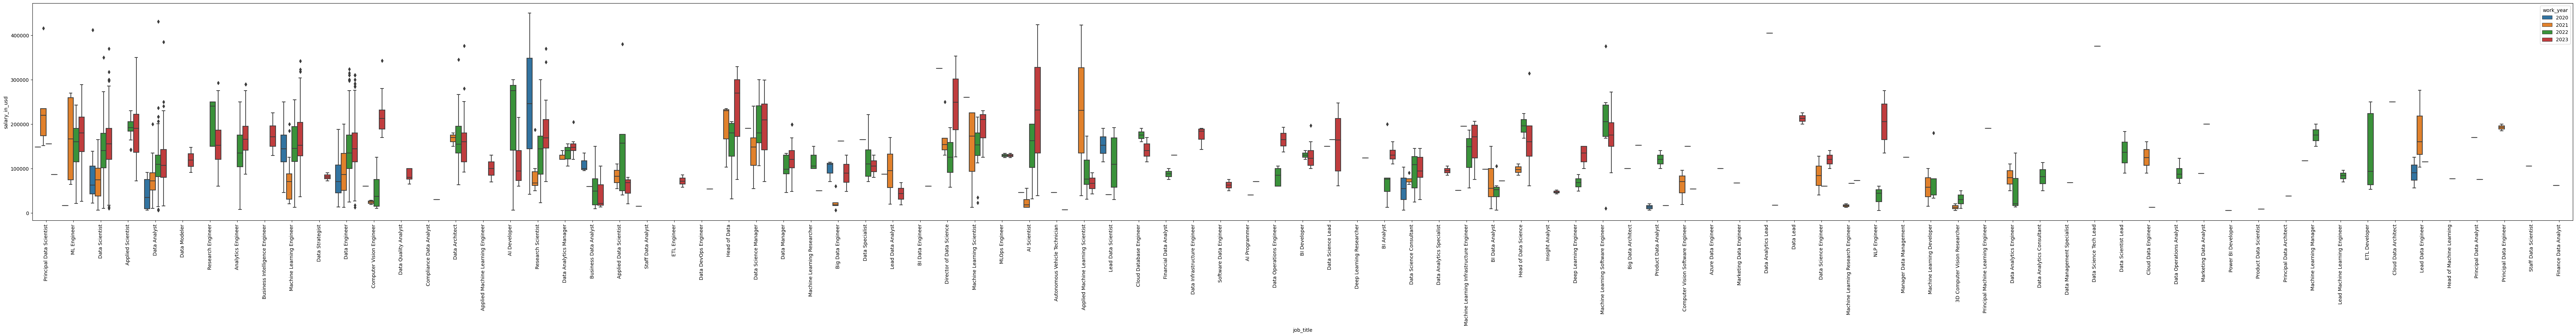

In [40]:
plt.figure(figsize=(df_data_salaries['job_title'].nunique(), 8))
sns.boxplot(data=df_data_salaries, x='job_title', y='salary_in_usd', 
              hue='work_year')
plt.xticks(rotation='vertical')
plt.show()

Job title 'research scientist' and similar roles appriciate long serving time at this role. 

However, data science, NPL, machine learning, and AI related role reward better for employee get into the role from 2022 and 2023. This is the new trend where higher paid job goes.

only four numerical columns available in the raw data set.
one of them (salary) not quite useful if not use together with salary currency.

remaining three are: work_year, salary_in_usd, and remote_ratio.

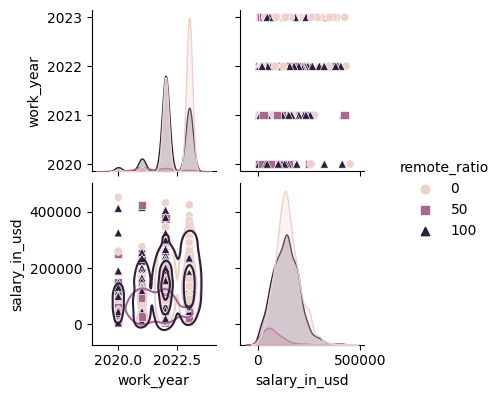

In [41]:
sns.pairplot(df_data_salaries[['work_year', 'salary_in_usd', 'remote_ratio']],
             hue='remote_ratio', markers=['o','s','^'], 
             height=2, diag_kind="kde").map_lower(sns.kdeplot, levels=4, color=".2")

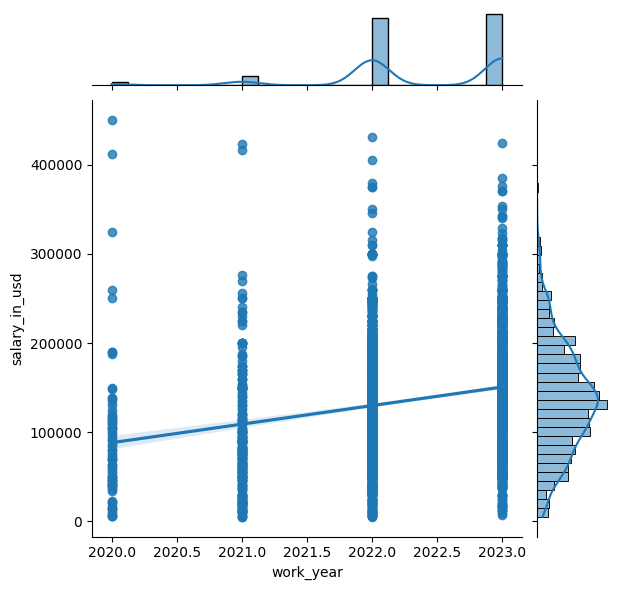

In [42]:
sns.jointplot(data=df_data_salaries, x='work_year', y='salary_in_usd', kind='reg')

Yep, you work longer in a company, the higher chance to get a better salary. Majority of employees earn between 50k and 200k USD.

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

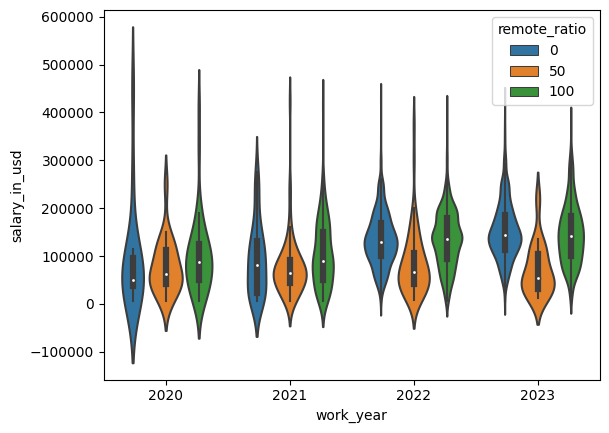

In [43]:
sns.violinplot(data=df_data_salaries, x='work_year', y='salary_in_usd', 
              hue='remote_ratio')

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

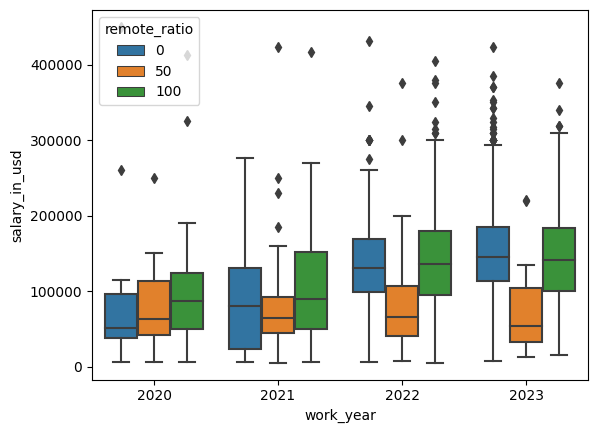

In [44]:
sns.boxplot(data=df_data_salaries, x='work_year', y='salary_in_usd', 
              hue='remote_ratio')

when work_year no less than 2, salary difference is minimum between fully at company or home. but working hybrid earn significan less than others.

when work_year less than 2, however, working remotely gain slight advantage in term of staring salary gain than employees who work at the company. working hybridly has less effect than those who work in company for a long time. 

Despite work year, all highest salary was secured by the remote_ratio 0 group.

In [45]:
# Let's take back focus on those non-numerical columns, 
# and figure out how many unique values available 
# ( in term of work_year, experience_level, job_title, employee_residence,
# company_location, and company_size)
# There are two ways to do so: 
# print(df.column_name.unique())
# print(pd.unique(df['column_name']))

print('Work Years:')
print(df_data_salaries.work_year.unique())

print('\nExperience Level:')
print(df_data_salaries.experience_level.unique())

print('\nEmployment Type:')
print(df_data_salaries.employment_type.unique())

print('\nJob Title:')
print(df_data_salaries.job_title.unique())

print('\nEmployee Residence:')
print(df_data_salaries.employee_residence.unique())

print('\nCompany Location:')
print(df_data_salaries.company_location.unique())

print('\nCompany Size:')
print(df_data_salaries.company_size.unique())

Work Years:
[2023 2022 2020 2021]

Experience Level:
['SE' 'MI' 'EN' 'EX']

Employment Type:
['FT' 'CT' 'FL' 'PT']

Job Title:
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'


In [46]:
# Next, assign a numercial value to each option in the record's property (column).
# Processe of Label Encoding...
# Label encoding assigns each unique value to a different integer.
# Peplacing the categorical value with a numeric value between 0 
# and the number of classes minus 1. Suitable for Job Title and Location.
# Take an help of preprocessing module from sklearn package 
# and import LabelEncoder class.
# An Ordinal Encoder is used to encode categorical features into 
# an ordinal numerical value (ordered set).
# Suit for years, experience and size etc.

from sklearn.preprocessing import OrdinalEncoder
enc_work_year = OrdinalEncoder()
df_data_salaries[['work_year']] = enc_work_year.fit_transform(df_data_salaries[['work_year']])

In [47]:
enc_experience_level = OrdinalEncoder()
df_data_salaries[['experience_level']] = enc_experience_level.fit_transform(df_data_salaries[['experience_level']])

In [48]:
enc_company_size = OrdinalEncoder()
df_data_salaries[['company_size']] = enc_company_size.fit_transform(df_data_salaries[['company_size']])

In [49]:
enc_employment_type = OrdinalEncoder()
df_data_salaries[['employment_type']] = enc_employment_type.fit_transform(df_data_salaries[['employment_type']])

In [50]:
# I noticed that Employee Residence and Company Location share
# same set of initialism for places (nations & regions).
# For this reason I have to encoding them to the same set of number
# and do not cause confusion or misunderstanding.

from sklearn.preprocessing import LabelEncoder
#le_location = LabelEncoder()
#selected_columns = ['employee_residence', 'company_location']
#le_location.fit(df_data_salaries[selected_columns].values.flatten())
#df_data_salaries[selected_columns] = df_data_salaries[selected_columns].apply(le_location.fit_transform)

# I decide no to use label encoder for employee residence and company location any more.
# I will divid all geo-location in to three classes: 
# high income counties, low income countries and newly emerging economies.
# Then, apply Ordinal Encoding.

In [51]:
# Now, I will just do Job Titles as ordinary label encoding.

from sklearn import preprocessing
le_job_title = preprocessing.LabelEncoder()

df_data_salaries['job_title'] = le_job_title.fit_transform(df_data_salaries['job_title'])


Example For Limitation of Label Encoding 
An attribute having output classes Mexico, Paris, Dubai. On Label Encoding, this column lets Mexico is replaced with 0, Paris is replaced with 1, and Dubai is replaced with 2. 

With this, it can be interpreted that Dubai has high priority than Mexico and Paris while training the model, But actually, there is no such priority relation between these cities here.

In our case, if a job title replaced with 90, another job title relaced with 64... you know what gonna happend. How to encounter this???

The solution may be is Country Classification beased on World Bank date.
Countries fall into one of next three categories:
high-income (developed) countries (HIC), 
newly emerging economies (emerging) (NEE) and low-income countries (developing) (LIC).
I would use Odinary Encoding to simpilify the country & region infomation in the dataframe.
Ref: https://www.internetgeography.net/topics/how-are-countries-classified/#:~:text=Based%20on%20GNI%2C%20countries%20are,%241%2C045%20or%20less%20in%202020.

In [52]:
# Load countries categorization informaiton from HIC.csv and LIC.csv

df_HIC = pd.read_csv('Resources/datasets/HIC.csv')
print(df_HIC.head(10))

  Alpha-2_Code              Country
0           AD              Andorra
1           AG  Antigua and Barbuda
2           AW                Aruba
3           AU            Australia
4           AT              Austria
5           BS              Bahamas
6           BH              Bahrain
7           BB             Barbados
8           BE              Belgium
9           BM              Bermuda


In [53]:
df_LIC = pd.read_csv('Resources/datasets/LIC.csv')
print(df_LIC.head(10))

  Alpha-2_Code                   Country
0           AF               Afghanistan
1           BF              Burkina Faso
2           BI                   Burundi
3           CF  Central African Republic
4           TD                      Chad
5           CG                     Congo
6           ER                   Eritrea
7           ET                  Ethiopia
8           GM                    Gambia
9           GN                    Guinea


In [54]:
# Define categorization criteria and function
def categorize_country(country):
    if country in df_HIC['Alpha-2_Code'].to_numpy():
        return 'HIC'
    elif country in df_LIC['Alpha-2_Code'].to_numpy():
        return 'LIC'
    else:
        return 'NEE'

In [55]:
# Tesing the function above if it works properly.
#print(categorize_country('GM'))
#df_HIC['Alpha-2_Code'].isin(['BB'])
#type("Hello")
print('AU' in df_HIC['Alpha-2_Code'].to_numpy())
print(categorize_country('AU'))

True
HIC


In [56]:
# iterate through each row and select
# 'employee_residence' and 'company_location' column respectively.
print(df_data_salaries.loc[0, 'employee_residence'])
for i in range(len(df_data_salaries)):
    df_data_salaries.loc[i, 'employee_residence'] = categorize_country(df_data_salaries.loc[i, 'employee_residence'])
    df_data_salaries.loc[i, 'company_location'] = categorize_country(df_data_salaries.loc[i, 'company_location'])
#type(df_data_salaries.loc[0, 'employee_residence'])
print(df_data_salaries.loc[0, 'employee_residence'])

ES


HIC


In [57]:
enc_employee_residence = OrdinalEncoder()
enc_company_location = OrdinalEncoder()
df_data_salaries[['employee_residence']] = enc_employee_residence.fit_transform(df_data_salaries[['employee_residence']])
df_data_salaries[['company_location']] = enc_company_location.fit_transform(df_data_salaries[['company_location']])

In [58]:
print(df_data_salaries.tail(5))

      work_year  experience_level  employment_type  job_title   salary  \
3750        0.0               3.0              2.0         47   412000   
3751        1.0               2.0              2.0         84   151000   
3752        0.0               0.0              2.0         47   105000   
3753        0.0               0.0              0.0         17   100000   
3754        1.0               3.0              2.0         45  7000000   

     salary_currency  salary_in_usd  employee_residence  remote_ratio  \
3750             USD         412000                 0.0           100   
3751             USD         151000                 0.0           100   
3752             USD         105000                 0.0           100   
3753             USD         100000                 0.0           100   
3754             INR          94665                 2.0            50   

      company_location  company_size  
3750               0.0           0.0  
3751               0.0           0.0  

In [59]:
# Next will be the mean value for numeric column. 
# Maybe I should mapping non-numberic column to a number later on.
df_data_salaries.mean(axis='index', skipna=True, numeric_only=True)


work_year                  2.373635
experience_level           2.469241
employment_type            1.996538
job_title                 39.661784
salary                190695.571771
salary_in_usd         137570.389880
employee_residence         0.100666
remote_ratio              46.271638
company_location           0.080959
company_size               0.918509
dtype: float64

In [60]:
# Show the standard deviation of all columns
df_data_salaries.std(axis='index', skipna=True, numeric_only=True)

work_year                  0.691448
experience_level           0.906261
employment_type            0.133550
job_title                 18.536695
salary                671676.500508
salary_in_usd          63055.625278
employee_residence         0.436711
remote_ratio              48.589050
company_location           0.393537
company_size               0.392071
dtype: float64

In [61]:
# 
df_data_salaries.dtypes

work_year             float64
experience_level      float64
employment_type       float64
job_title               int32
salary                  int64
salary_currency        object
salary_in_usd           int64
employee_residence    float64
remote_ratio            int64
company_location      float64
company_size          float64
dtype: object

In [62]:
# Now I have to do some work about type conversion.

df_data_salaries['work_year '] = df_data_salaries['work_year '].astype(int)
df_data_salaries['experience_level'] = df_data_salaries['experience_level'].astype(int)
df_data_salaries['employment_type'] = df_data_salaries['employment_type'].astype(int)
df_data_salaries['job_title'] = df_data_salaries['job_title'].astype(int)
df_data_salaries['employee_residence'] = df_data_salaries['employee_residence'].astype(int)
df_data_salaries['company_location'] = df_data_salaries['company_location'].astype(int)
df_data_salaries['company_size'] = df_data_salaries['company_size'].astype(int)
df_data_salaries.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,3.0,3,2,84,80000,EUR,85847,0,100,0,0
1,3.0,2,0,66,30000,USD,30000,0,100,0,2
2,3.0,2,0,66,25500,USD,25500,0,100,0,2
3,3.0,3,2,47,175000,USD,175000,0,100,0,1
4,3.0,3,2,47,120000,USD,120000,0,100,0,1


## 2. Clean data

In [63]:
df_data_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3755 non-null   float64
 1   experience_level    3755 non-null   int32  
 2   employment_type     3755 non-null   int32  
 3   job_title           3755 non-null   int32  
 4   salary              3755 non-null   int64  
 5   salary_currency     3755 non-null   object 
 6   salary_in_usd       3755 non-null   int64  
 7   employee_residence  3755 non-null   int32  
 8   remote_ratio        3755 non-null   int64  
 9   company_location    3755 non-null   int32  
 10  company_size        3755 non-null   int32  
dtypes: float64(1), int32(6), int64(3), object(1)
memory usage: 234.8+ KB


In [64]:
df_data_salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2.373635,0.691448,0.0,2.0,2.0,3.0,3.0
experience_level,3755.0,2.469241,0.906261,0.0,2.0,3.0,3.0,3.0
employment_type,3755.0,1.996538,0.133550,0.0,2.0,2.0,2.0,3.0
job_title,3755.0,39.661784,18.536695,0.0,27.0,33.0,47.0,92.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
employee_residence,3755.0,0.100666,0.436711,0.0,0.0,0.0,0.0,2.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0
company_location,3755.0,0.080959,0.393537,0.0,0.0,0.0,0.0,2.0
company_size,3755.0,0.918509,0.392071,0.0,1.0,1.0,1.0,2.0


In [65]:
df_data_salaries.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

From the info above, we got 3775 entries, 3775 of them are non-null.
That's good sign of no empty properties. Next I will drop column 'salary', 'salary_currency' as I will use 'salary_in_usd' as main measurement.

In [66]:
print(df_data_salaries.columns)
df_data_salaries=df_data_salaries.drop(columns=['salary', 'salary_currency'])
df_data_salaries.head(5)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,3.0,3,2,84,85847,0,100,0,0
1,3.0,2,0,66,30000,0,100,0,2
2,3.0,2,0,66,25500,0,100,0,2
3,3.0,3,2,47,175000,0,100,0,1
4,3.0,3,2,47,120000,0,100,0,1


now, everything in the df_data_salaries are numerical.

## 3. Visualise data

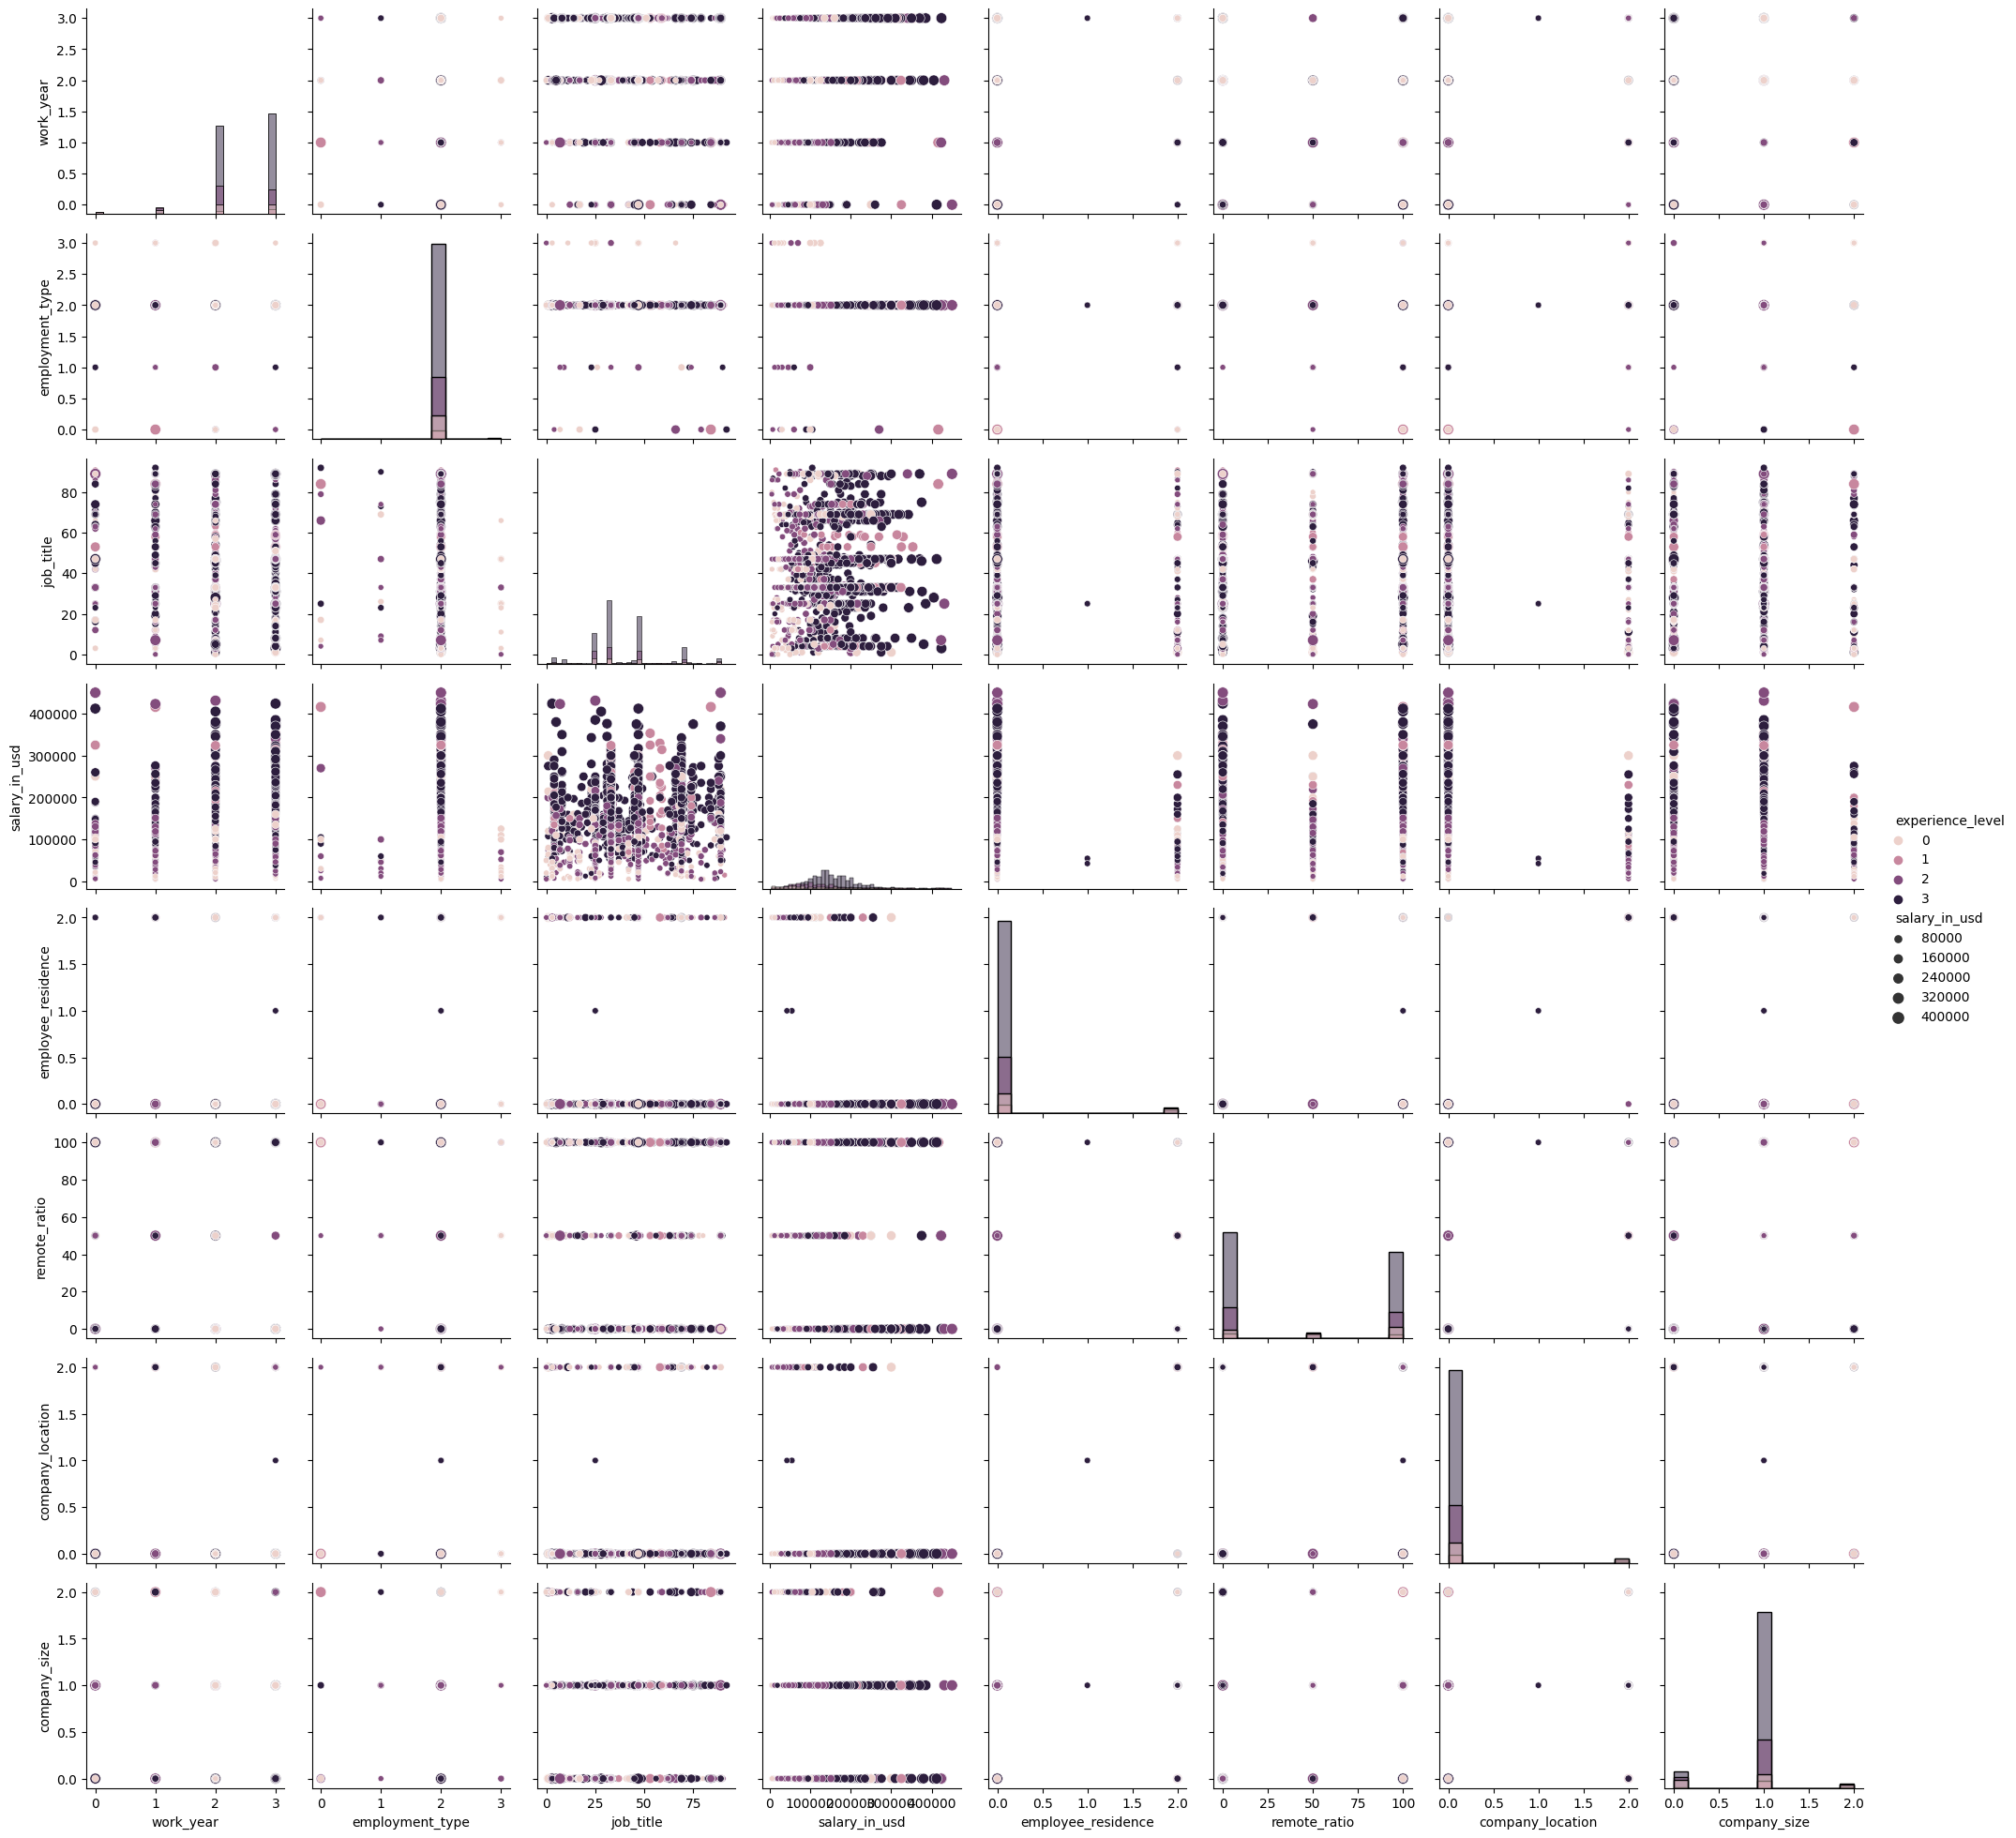

In [67]:
g=sns.PairGrid(df_data_salaries, hue='experience_level')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, size=df_data_salaries['salary_in_usd'])
g.add_legend(title="", adjust_subtitles=True)

## 4. Identify correlated variables

It's time to bring on the heatmap to see if anything shows up.

<Axes: >

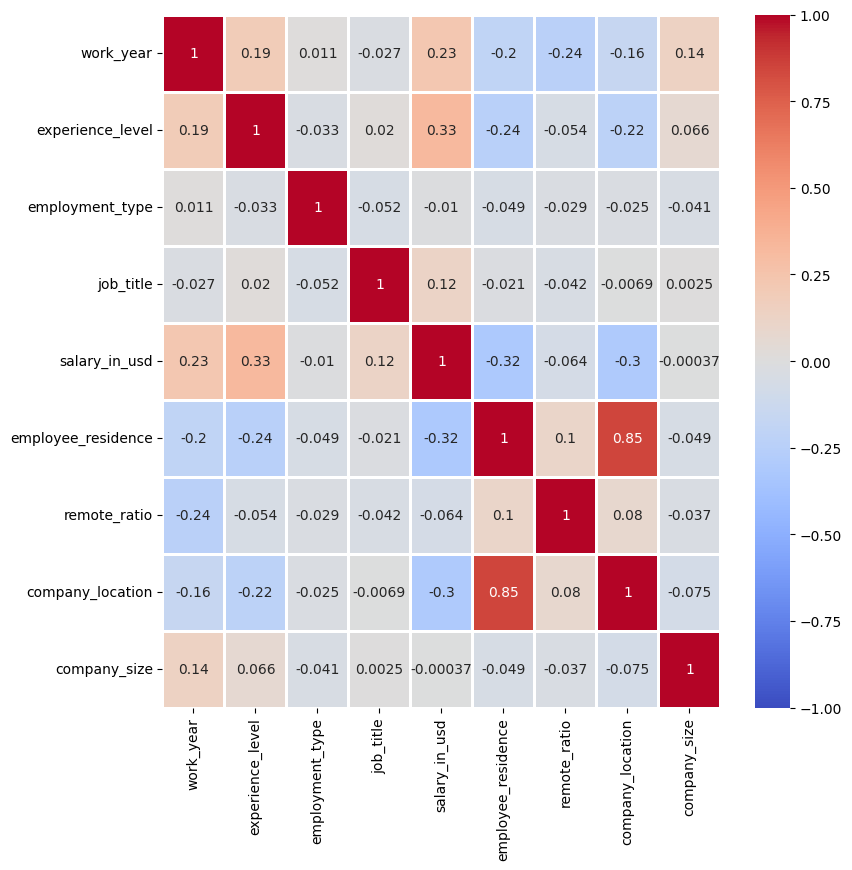

In [68]:
corr_mx_salary = df_data_salaries.corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corr_mx_salary, annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linecolor='white', linewidths=1)

Base on the information shown on the heatmap, there are several pair of correlation exsiting.

From strong to weak are:

0.85 employee_residence - company_location

0.33 experience_level - salary_in_usd

0.23 work_year - salary_in_usd

0.19 work_year - emperience_level

0.14 work_year - company_size

0.12 job_title - salary_in_usd

0.10 remote_ratio - employee_residence

0.08 remote_ratio - company_location

factors correlated with salary_in_usd are:

experience_level, work_year, and job_title

Which means in general, more experience, longer work years and advance job title have positive impact on the possiblity of higher salary.

On the other hand, columns 'employment_type', 'employee_residence', 'remote_ratio', 'company_location', and 'company_size' show no strong correlation with salary_in_usd.

Therefore, I will drop those columns from the dataframe.

In [72]:
df_data_salaries=df_data_salaries.drop(columns=['employment_type', 
                                                'employee_residence', 
                                                'remote_ratio', 
                                                'company_location', 
                                                'company_size'])
df_data_salaries.head(5)

,work_year,experience_level,job_title,salary_in_usd
0,3.0,3,84,85847
1,3.0,2,66,30000
2,3.0,2,66,25500
3,3.0,3,47,175000
4,3.0,3,47,120000


In [73]:
# export the pre-processed dataframe into csv file

df_data_salaries.to_csv('Resources/datasets/preprocessed_salaries.csv', 
                        index=False, encoding='utf-8')

## 5. Summary

For data stream this year part 1, I chose the 'data_salary' as dataset and using seaborn to plot the data.

Before the poltting, emtep records has been checked. No missing value in the dataset. Non-significant features such as 'salary' and 'salary_currency' were dropped.All non-numerical data has been encoded to numberical data using variant of encoding methods. 

After plotting the data, correlation was spotted between dataset atrributes. Some of them relately strong than rest.

Results and fidings:

1. Majority of emplyee's resident place was decided by where the company they working for.
2. Emplyee's experience level has a strong correlation with the salary they get.
3. The longer they served in a company, higher likelyhood they get heightened pay scale.
4. It seems emplyee serving relatively longer in large corporation.
5. Employee who gain certain job titles earns more than others.
6. Both employee residence and company location will effect employee's remote working ratio.
7. The effect of working remotely impact salary they earn depending on how long they work at the job. 
8. Job title 'research scientist' and similar roles appriciate long serving time on the role. 
However, data science, NPL, machine learning, and AI related role reward better for employee get into the role from 2022 and 2023. This is the new trend where higher paid jobs goes.

Future Works:

Next, I will start to train a model to see how well it can fit the data set.